# Question 2

Assume the initial position of the end-effector is p = (1, 2, 3). The goal is for the end-effector to pass through a via-point (5, 10, 12) at t = 1s and reach the goal at (10, 8, 7) by t = 5s.

1. Generate a 3D trajectory for the end-effector using two second-order polynomials, one for each dimension (planning in Cartesian space).
2. Plot the generated trajectories in the form of t-x, t-y, and t-z (one figure for each dimension).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X(t) = -0.5500*t^2 + 4.5500*t + 1.0000
Y(t) = -1.7000*t^2 + 9.7000*t + 2.0000
Z(t) = -2.0500*t^2 + 11.0500*t + 3.0000


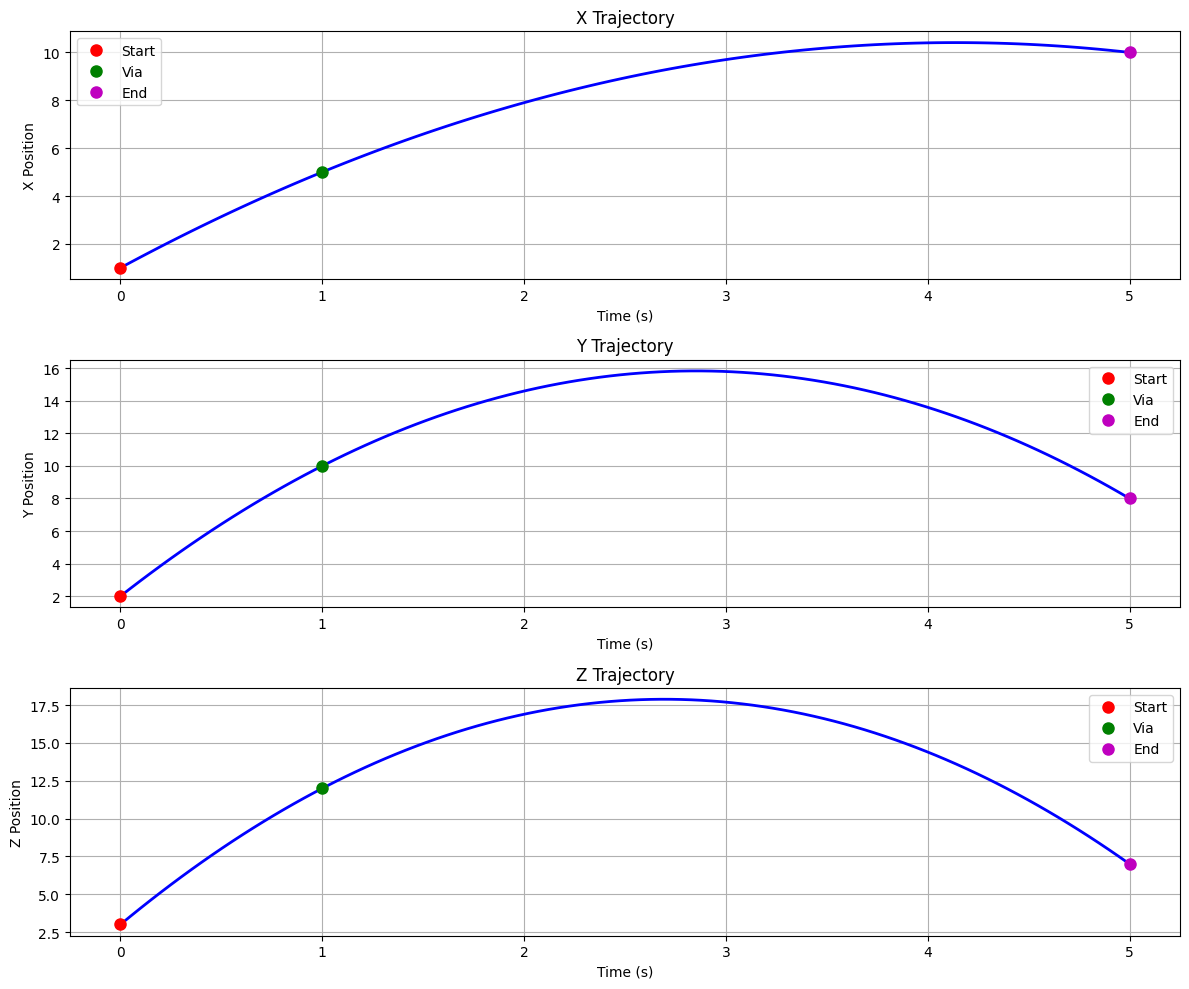

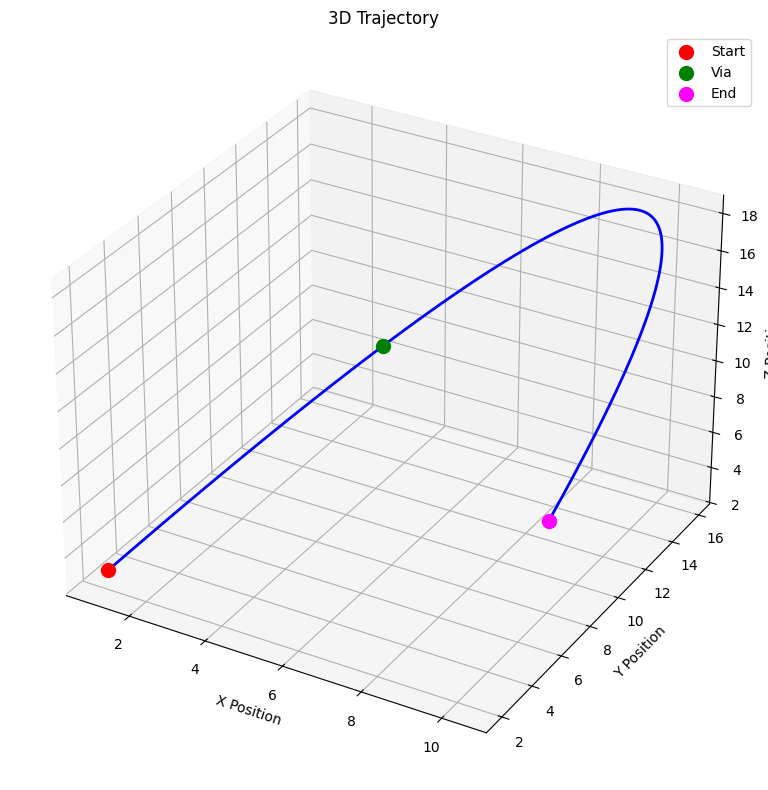

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the time and position of start point, via point and end-point
start_point, via_point, end_point = np.array([1, 2, 3]), np.array([5, 10, 12]), np.array([10, 8, 7])
points = np.array([
    start_point,
    via_point,
    end_point
])
start_time, via_time, end_time = 0.0, 1.0, 5.0

# Function to solve for second-order polynomial coefficients
def solve_coefficients(t0, t1, t2, p0, p1, p2):
    """
    Solve for coefficients a, b, c in p(t) = a*t^2 + b*t + c
    given three time-position pairs.
    """
    # Set up the system of equations
    A = np.array([
        [t0**2, t0, 1],
        [t1**2, t1, 1],
        [t2**2, t2, 1]
    ])
    b = np.array([p0, p1, p2])
    
    # Solve the system
    coeffs = np.linalg.solve(A, b)
    return coeffs

# Solve for coefficients in each dimension
x_coeffs = solve_coefficients(start_time, via_time, end_time, 
                             start_point[0], via_point[0], end_point[0])
y_coeffs = solve_coefficients(start_time, via_time, end_time, 
                             start_point[1], via_point[1], end_point[1])
z_coeffs = solve_coefficients(start_time, via_time, end_time, 
                             start_point[2], via_point[2], end_point[2])

# Display the coefficients
print("X(t) = {:.4f}*t^2 + {:.4f}*t + {:.4f}".format(*x_coeffs))
print("Y(t) = {:.4f}*t^2 + {:.4f}*t + {:.4f}".format(*y_coeffs))
print("Z(t) = {:.4f}*t^2 + {:.4f}*t + {:.4f}".format(*z_coeffs))

# Generate trajectory points
t = np.linspace(start_time, end_time, 100)
x_traj = x_coeffs[0]*t**2 + x_coeffs[1]*t + x_coeffs[2]
y_traj = y_coeffs[0]*t**2 + y_coeffs[1]*t + y_coeffs[2]
z_traj = z_coeffs[0]*t**2 + z_coeffs[1]*t + z_coeffs[2]

# Create a figure for the 3D trajectory
fig = plt.figure(figsize=(12, 10))

# Plot X trajectory
ax1 = fig.add_subplot(311)
ax1.plot(t, x_traj, 'b-', linewidth=2)
ax1.plot(start_time, start_point[0], 'ro', markersize=8, label='Start')
ax1.plot(via_time, via_point[0], 'go', markersize=8, label='Via')
ax1.plot(end_time, end_point[0], 'mo', markersize=8, label='End')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('X Position')
ax1.set_title('X Trajectory')
ax1.grid(True)
ax1.legend()

# Plot Y trajectory
ax2 = fig.add_subplot(312)
ax2.plot(t, y_traj, 'b-', linewidth=2)
ax2.plot(start_time, start_point[1], 'ro', markersize=8, label='Start')
ax2.plot(via_time, via_point[1], 'go', markersize=8, label='Via')
ax2.plot(end_time, end_point[1], 'mo', markersize=8, label='End')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Y Position')
ax2.set_title('Y Trajectory')
ax2.grid(True)
ax2.legend()

# Plot Z trajectory
ax3 = fig.add_subplot(313)
ax3.plot(t, z_traj, 'b-', linewidth=2)
ax3.plot(start_time, start_point[2], 'ro', markersize=8, label='Start')
ax3.plot(via_time, via_point[2], 'go', markersize=8, label='Via')
ax3.plot(end_time, end_point[2], 'mo', markersize=8, label='End')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Z Position')
ax3.set_title('Z Trajectory')
ax3.grid(True)
ax3.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Additionally, create a 3D visualization of the trajectory
fig3d = plt.figure(figsize=(10, 8))
ax3d = fig3d.add_subplot(111, projection='3d')
ax3d.plot3D(x_traj, y_traj, z_traj, 'blue', linewidth=2)
ax3d.scatter(start_point[0], start_point[1], start_point[2], color='red', s=100, label='Start')
ax3d.scatter(via_point[0], via_point[1], via_point[2], color='green', s=100, label='Via')
ax3d.scatter(end_point[0], end_point[1], end_point[2], color='magenta', s=100, label='End')
ax3d.set_xlabel('X Position')
ax3d.set_ylabel('Y Position')
ax3d.set_zlabel('Z Position')
ax3d.set_title('3D Trajectory')
ax3d.legend()

plt.tight_layout()
plt.show()

In [8]:
# NOTE: For this question, you don't need to discuss the results in your report. You only need to the implement the trajectory generation in the above cell.
